<a href="https://colab.research.google.com/github/cgrundman/ZTM-TensorFlow-Developer/blob/main/03_introduction_to_computer_vision_in_tensorflow_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer Vision is the practice of writing algorithms which discover patterns in visual data. Such as the cameras of a self-driving car recognizing the car in front.



## Get the data

The images we're working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/dansbecker/food-101

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2024-05-20 15:20:27--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.207, 142.251.12.207, 172.217.194.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  22.8MB/s    in 5.6s    

2024-05-20 15:20:33 (18.5 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a machine learning project this means visualizing many samples of your data.

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/

pizza  steak


In [4]:
!ls pizza_steak/train/steak | head -10

1000205.jpg
100135.jpg
101312.jpg
1021458.jpg
1032846.jpg
10380.jpg
1049459.jpg
1053665.jpg
1068516.jpg
1068975.jpg


In [5]:
import os

# Walk through pizza_steak directory and list the number of files
for dirpath, dirnames, filenames, in os.walk('pizza_steak'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [6]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

To visualize our images, let's get the class names programmatically.

In [7]:
# Get the class names programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [8]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the btarget image directory (we'll view imagews from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape {img.shape}")

  return img

['52934.jpg']
Image shape (512, 384, 3)


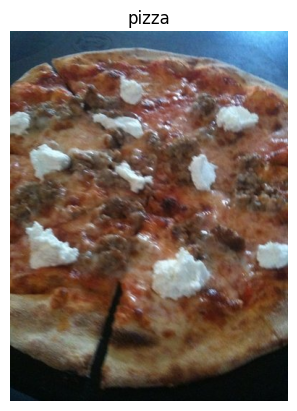

In [9]:
# View a random image from the training data set
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [10]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 384, 3), dtype=uint8, numpy=
array([[[ 33,  71,  84],
        [ 32,  70,  83],
        [ 33,  69,  83],
        ...,
        [ 99, 191, 242],
        [ 99, 191, 240],
        [ 91, 183, 232]],

       [[ 28,  66,  79],
        [ 29,  67,  80],
        [ 33,  69,  83],
        ...,
        [ 97, 189, 240],
        [100, 192, 241],
        [ 92, 184, 233]],

       [[ 25,  63,  76],
        [ 27,  65,  78],
        [ 31,  67,  81],
        ...,
        [ 97, 187, 239],
        [101, 193, 244],
        [ 96, 188, 239]],

       ...,

       [[  9,  23,  34],
        [  9,  23,  34],
        [  9,  23,  34],
        ...,
        [  5,  11,  11],
        [  6,  12,  12],
        [  7,  13,  13]],

       [[  8,  22,  33],
        [  8,  22,  33],
        [  7,  21,  32],
        ...,
        [  5,  11,  11],
        [  6,  12,  12],
        [  8,  14,  14]],

       [[  6,  20,  31],
        [  6,  20,  31],
        [  6,  20,  31],
        ...,
        [  5,  11,  1

In [11]:
# View the image shape
img.shape

(512, 384, 3)

In [12]:
# Get all the pixel values between 0 and 1
img/255.

array([[[0.12941176, 0.27843137, 0.32941176],
        [0.1254902 , 0.2745098 , 0.3254902 ],
        [0.12941176, 0.27058824, 0.3254902 ],
        ...,
        [0.38823529, 0.74901961, 0.94901961],
        [0.38823529, 0.74901961, 0.94117647],
        [0.35686275, 0.71764706, 0.90980392]],

       [[0.10980392, 0.25882353, 0.30980392],
        [0.11372549, 0.2627451 , 0.31372549],
        [0.12941176, 0.27058824, 0.3254902 ],
        ...,
        [0.38039216, 0.74117647, 0.94117647],
        [0.39215686, 0.75294118, 0.94509804],
        [0.36078431, 0.72156863, 0.91372549]],

       [[0.09803922, 0.24705882, 0.29803922],
        [0.10588235, 0.25490196, 0.30588235],
        [0.12156863, 0.2627451 , 0.31764706],
        ...,
        [0.38039216, 0.73333333, 0.9372549 ],
        [0.39607843, 0.75686275, 0.95686275],
        [0.37647059, 0.7372549 , 0.9372549 ]],

       ...,

       [[0.03529412, 0.09019608, 0.13333333],
        [0.03529412, 0.09019608, 0.13333333],
        [0.03529412, 0

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set random seed
tf.random.set_seed(42)

# Preprocess our data
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 19s 193ms/step - loss: 0.5404 - accuracy: 0.7313 - val_loss: 0.4003 - val_accuracy: 0.8460
Epoch 2/5
47/47 [==============================] - 8s 169ms/step - loss: 0.4248 - accuracy: 0.8133 - val_loss: 0.3622 - val_accuracy: 0.8500
Epoch 3/5
47/47 [==============================] - 7s 149ms/step - loss: 0.3939 - accuracy: 0.8307 - val_loss: 0.3978 - val_accuracy: 0.8140
Epoch 4/5
47/47 [==============================] - 6s 119ms/step - loss: 0.3498 - accuracy: 0.8533 - val_loss: 0.3593 - val_accuracy: 0.8280
Epoch 5/5
47/47 [==============================] - 7s 152ms/step - loss: 0.2702 - accuracy: 0.8960 - val_loss: 0.3237 - val_accuracy: 0.8580


In [14]:
# Get a model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

## Using the same model as before

Let's replicate the model we've built in a previous section to see if if works withour image data.

The model we're building is from tensorflow playground.

In [15]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# COmpile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 136ms/step - loss: 1.3937 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 5s 111ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 6s 138ms/step - loss: 0.6932 - accuracy: 0.4827 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 5s 116ms/step - loss: 0.6932 - accuracy: 0.4920 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 6s 133ms/step - loss: 0.6932 - accuracy: 0.4813 - val_loss: 0.6931 - val_accuracy: 0.5000


In [16]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Despite having 20x more parameter than our CNN (model 1), model_2 performs terribly... let's try again.

In [17]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# COmpile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 169ms/step - loss: 2.8785 - accuracy: 0.6040 - val_loss: 1.4903 - val_accuracy: 0.6780
Epoch 2/5
47/47 [==============================] - 5s 117ms/step - loss: 1.1695 - accuracy: 0.7047 - val_loss: 0.6835 - val_accuracy: 0.7100
Epoch 3/5
47/47 [==============================] - 6s 126ms/step - loss: 0.5573 - accuracy: 0.7720 - val_loss: 1.0739 - val_accuracy: 0.6040
Epoch 4/5
47/47 [==============================] - 5s 116ms/step - loss: 0.5229 - accuracy: 0.7840 - val_loss: 0.7321 - val_accuracy: 0.6900
Epoch 5/5
47/47 [==============================] - 7s 140ms/step - loss: 0.5291 - accuracy: 0.7847 - val_loss: 0.5592 - val_accuracy: 0.7540


In [18]:
# Get a summary of model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Binary Classification: Let's break it down

1. Become one with the data (vizualize, vizualize, vizualize)
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing)
3. Created a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

### 1. Become one with the data

['1446401.jpg']
Image shape (512, 512, 3)
['1035854.jpg']
Image shape (512, 512, 3)


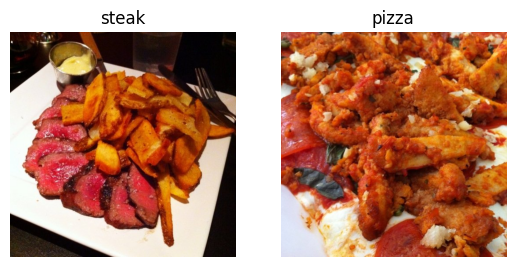

In [19]:
# Vizualize Data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)

In [20]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**.

A batch is a small subset of data. Rather than look at all ~10,000 images, at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into memory of your processor (GPU).
2. Trying to learn the patterns in the 10,000 images in one hit could result in the model not being able to learn very well.

Why 32?
Because 32 is good for your health...

In [21]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [22]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # target directory
                                               target_size=(224, 224), # target size of the images (height, width)
                                               class_mode='binary', # type of data you're working with
                                               batch_size=32) # size of minibatches to load data into

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [23]:
# Get a sample of a training data batch
images, labels = train_data.next() # get the "next" batch of images/lables in train_data
len(images), len(labels)

(32, 32)

In [24]:
# How many batches are there?
len(train_data)

47

In [25]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.48627454, 0.42352945, 0.36078432],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.82745105, 0.7137255 , 0.48627454],
          [0.8431373 , 0.7372549 , 0.5294118 ],
          [0.87843144, 0.77647066, 0.58431375]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.49803925],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.4901961 ],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.77647

In [26]:
images[7].shape

(224, 224, 3)

In [27]:
# Veiw the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

**Note:** In deep learning, there is almost an infinite amount of architecture you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g. lookup which current model is performing best in the field for your problem).

In [28]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [29]:
# Create the model (this will be our baseline, a layer convolutional neural network)
model_4 = Sequential([
    Conv2D(filters=10, # filters is the number of sliding widnwos going across an input
           kernel_size=3, # size of sliding window going across input
           strides=1, # size of step sliding window takes across an inputt
           padding="valid", # if "same" output size equals input size, if "valid" output gets compressed
           activation="relu",
           input_shape=(224, 224, 3)), # input layer (specify input shape)
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") # output layer (working with binary classification so only 1 neuron)
])

In [30]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [31]:
# Get a summary of our model
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 484000)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 484001    
                                                                 
Total params: 485191 (1.85 MB)
Trainable params: 485191 (1.85 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 4. Fit the model

In [32]:
# Check the lengths of traininf and test data generators
len(train_data), len(test_data)

(47, 16)

In [33]:
# Fit the model
history_4 = model_4.fit(train_data, # this is a combination of labels and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 7s 132ms/step - loss: 1.2078 - accuracy: 0.6407 - val_loss: 0.4539 - val_accuracy: 0.8080
Epoch 2/5
47/47 [==============================] - 8s 166ms/step - loss: 0.3957 - accuracy: 0.8273 - val_loss: 0.3735 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 6s 134ms/step - loss: 0.2272 - accuracy: 0.9253 - val_loss: 0.3351 - val_accuracy: 0.8580
Epoch 4/5
47/47 [==============================] - 6s 120ms/step - loss: 0.0875 - accuracy: 0.9813 - val_loss: 0.3941 - val_accuracy: 0.8320
Epoch 5/5
47/47 [==============================] - 7s 145ms/step - loss: 0.0274 - accuracy: 0.9973 - val_loss: 0.3558 - val_accuracy: 0.8600


In [34]:
model_1.evaluate(test_data)

16/16 [==============================] - 2s 92ms/step - loss: 0.3237 - accuracy: 0.8580


[0.32366862893104553, 0.8579999804496765]

In [35]:
model_4.evaluate(test_data)

16/16 [==============================] - 1s 91ms/step - loss: 0.3558 - accuracy: 0.8600


[0.3557572066783905, 0.8600000143051147]

### 5. Evaluating our model

It looks like our model is learning something, let's evaluate it.

<Axes: >

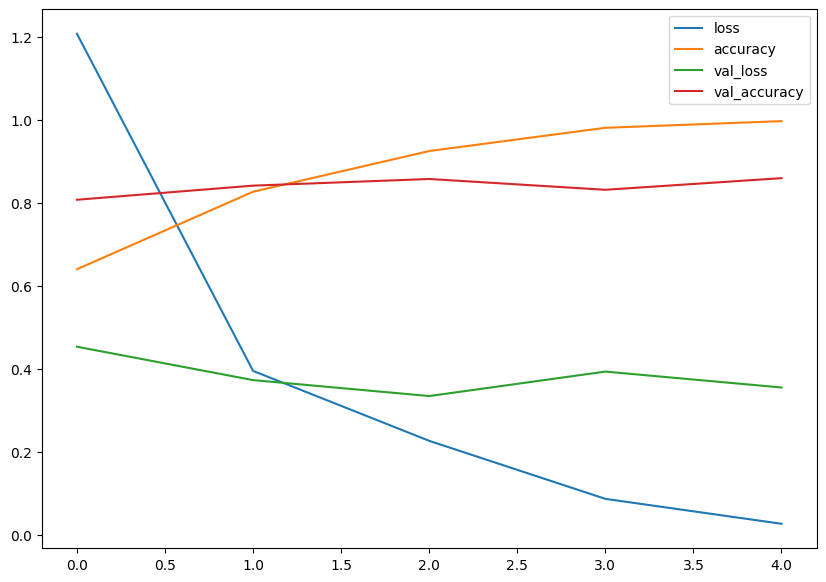

In [36]:
# Let's plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7))

In [37]:
# Plot the validation and training curves seperately
def plot_loss_curves(history):
  """
  Returns seperate loss curves for training and validation loss curves
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot Accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

**Note:** When a model's **validation loss starts to increase**, it's likely the model is **overfitting** the training dataset. It's learning patterns in the training dataset *too well* and thus the model's ability to generalize to unseen data with be diminished.

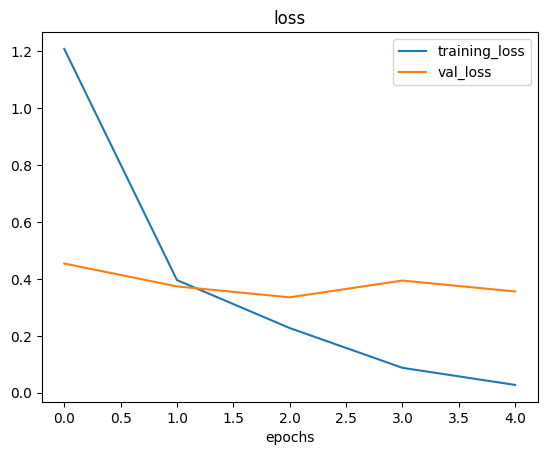

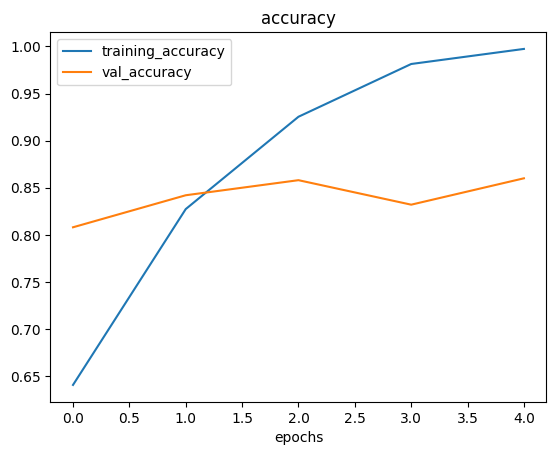

In [38]:
# Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce Overfitting

Ways to reduce overfitting:

*   Increase the number of conv layers
*   Increase the number of conv filters
*   Add another layer to the output of our flattened layer

Reduce overfitting:

*   Add data augmentation
*   Add regularization layers (such as MaxPool2D)
*   Add more data...


**Note:** Reducing overfitting is also known as regularization




In [39]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [40]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [41]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 8s 127ms/step - loss: 0.6157 - accuracy: 0.6633 - val_loss: 0.4397 - val_accuracy: 0.8200
Epoch 2/5
47/47 [==============================] - 7s 140ms/step - loss: 0.4654 - accuracy: 0.7907 - val_loss: 0.4468 - val_accuracy: 0.7900
Epoch 3/5
47/47 [==============================] - 6s 120ms/step - loss: 0.3986 - accuracy: 0.8220 - val_loss: 0.3193 - val_accuracy: 0.8720
Epoch 4/5
47/47 [==============================] - 6s 123ms/step - loss: 0.3953 - accuracy: 0.8240 - val_loss: 0.3089 - val_accuracy: 0.8820
Epoch 5/5
47/47 [==============================] - 6s 128ms/step - loss: 0.3613 - accuracy: 0.8453 - val_loss: 0.3512 - val_accuracy: 0.8540


In [42]:
# Get a summary of our model with max pooling
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 26, 26, 10)       

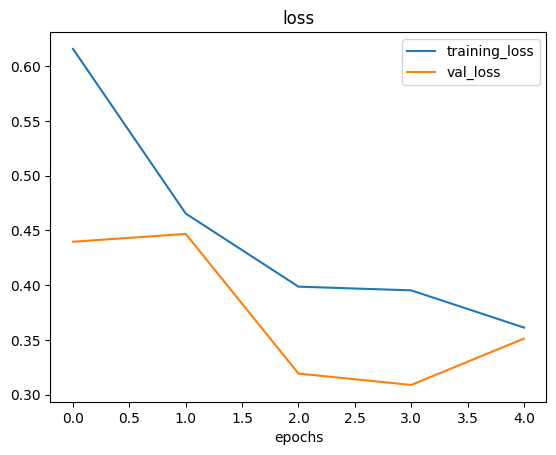

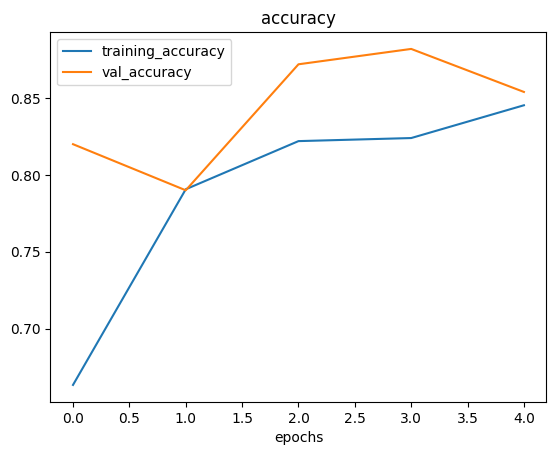

In [43]:
# Plot loss curves
plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augmentation

In [44]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator training instance without data augmentation for test data
test_datagen = ImageDataGenerator(rescale=1/255.)

**Question:** What is data augmentation?

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing out models to learn more generalizable (hopefully) patterns. Altering might mean adjusting the rotation of an image, fligging it, cropping it or something similar.

Let's write some code to visualize data augmentation.

In [45]:
# Import data and augment it from training directory
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False) # for demonstration purposes only

# Create non-augmented train data batches
print("Nonaugmented Training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

IMG_SIZE = (224, 224)
# Create non-augmented test data batches
print("Nonaugmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode="binary")

Augmented training data:
Found 1500 images belonging to 2 classes.
Nonaugmented Training data:
Found 1500 images belonging to 2 classes.
Nonaugmented test data:
Found 500 images belonging to 2 classes.


**Note:** Data augmentation is usually only performed on the training data. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.

Finally... let's visualize some augmented data!!!

In [46]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

Showing image number: 6


(-0.5, 223.5, 223.5, -0.5)

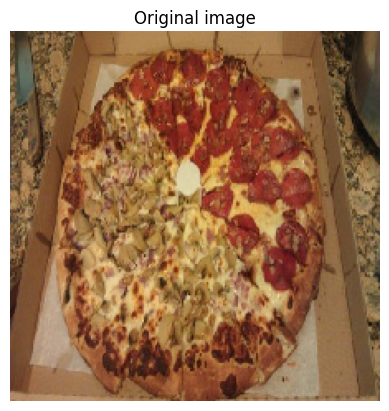

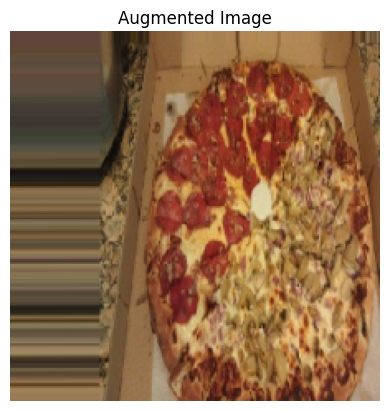

In [47]:
# Show the original image ad augmented image
import random
random_number = random.randint(0, 32) # our barch sizes are 32...
print(f"Showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title("Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title("Augmented Image")
plt.axis(False)

### Train a model on the augmented data

In [48]:
# Create the model (same as model 5)
model_6 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [49]:
# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [50]:
# Fit the model
history_6 = model_6.fit(train_data_augmented, # fitting model 6 on augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 442ms/step - loss: 0.7272 - accuracy: 0.5187 - val_loss: 0.6906 - val_accuracy: 0.6020
Epoch 2/5
47/47 [==============================] - 23s 499ms/step - loss: 0.6916 - accuracy: 0.5720 - val_loss: 0.6834 - val_accuracy: 0.7020
Epoch 3/5
47/47 [==============================] - 22s 472ms/step - loss: 0.7257 - accuracy: 0.5040 - val_loss: 0.6807 - val_accuracy: 0.5620
Epoch 4/5
47/47 [==============================] - 22s 472ms/step - loss: 0.6927 - accuracy: 0.5693 - val_loss: 0.6731 - val_accuracy: 0.7480
Epoch 5/5
47/47 [==============================] - 21s 441ms/step - loss: 0.6771 - accuracy: 0.6460 - val_loss: 0.6922 - val_accuracy: 0.5060


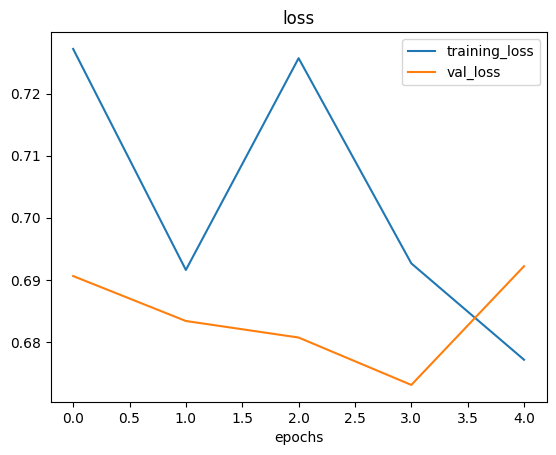

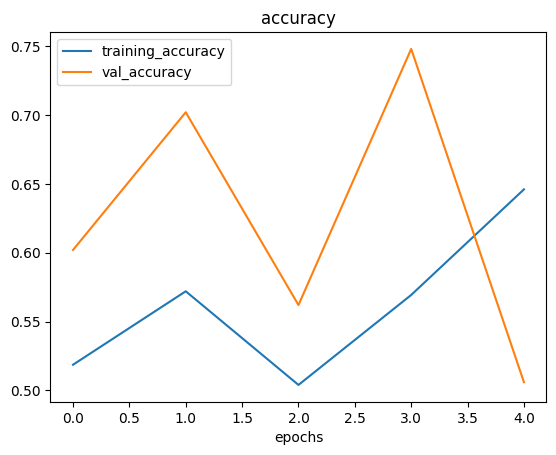

In [51]:
# Check model training curves
plot_loss_curves(history_6)

Let#s shuffle our augmented training data and train another model (the same as before) on it and see what happens.

In [52]:
# Import data and augment it and shuffle it from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                         target_size=(224, 224),
                                                                         class_mode="binary",
                                                                         batch_size=32,
                                                                         shuffle=True)

Found 1500 images belonging to 2 classes.


In [53]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [54]:
# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [55]:
# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 25s 490ms/step - loss: 0.6671 - accuracy: 0.5820 - val_loss: 0.6036 - val_accuracy: 0.6660
Epoch 2/5
47/47 [==============================] - 22s 475ms/step - loss: 0.5757 - accuracy: 0.6960 - val_loss: 0.4563 - val_accuracy: 0.7840
Epoch 3/5
47/47 [==============================] - 22s 463ms/step - loss: 0.5214 - accuracy: 0.7353 - val_loss: 0.3854 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 22s 477ms/step - loss: 0.4784 - accuracy: 0.7733 - val_loss: 0.3622 - val_accuracy: 0.8380
Epoch 5/5
47/47 [==============================] - 22s 470ms/step - loss: 0.4768 - accuracy: 0.7840 - val_loss: 0.3737 - val_accuracy: 0.8580


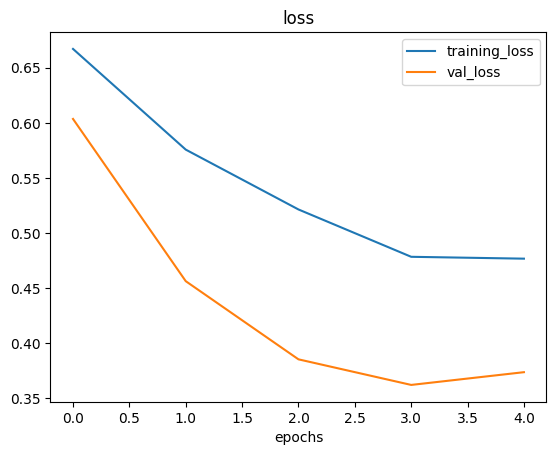

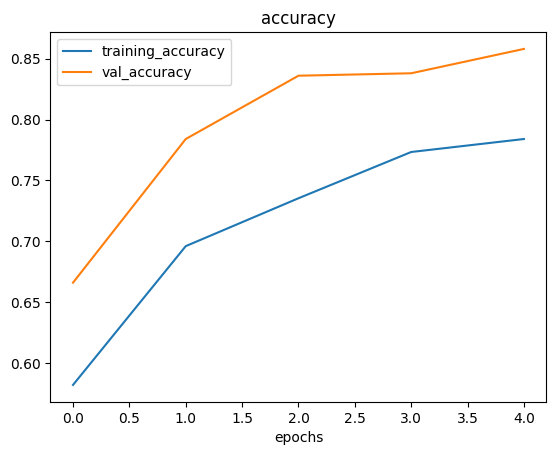

In [56]:
# Check model training curves
plot_loss_curves(history_7)

**Note:** When shuffling training data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features accross a wide array of images (in our case, pizza & steak at the same time insttead of just pizza then steak).

### 7. Repeat until satisfied

Since we've already beaten our baseline, therea re a few things we could try to continue to improve our model:

* Increase the number of model layers (e.g. add more `Conv2D` / `MaxPool2D` layers)
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data (give the model more opportunities to learn)
* Use **transfer learning** to leverage what another model has learned and adjust it for our ow use case

**Proctice:** Recreate the model on the CNN expainer website (same as `model_1`) and see how it performs on the shuffled training data.

In [57]:
# Create the model (same as model_1)
model_8 = Sequential([
    Conv2D(32, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(32, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(32, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_8.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 26s 489ms/step - loss: 0.7611 - accuracy: 0.5647 - val_loss: 0.6818 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 24s 505ms/step - loss: 0.7010 - accuracy: 0.5040 - val_loss: 0.6767 - val_accuracy: 0.5820
Epoch 3/5
47/47 [==============================] - 22s 477ms/step - loss: 0.6896 - accuracy: 0.5620 - val_loss: 0.6459 - val_accuracy: 0.6300
Epoch 4/5
47/47 [==============================] - 23s 487ms/step - loss: 0.9937 - accuracy: 0.6293 - val_loss: 0.8980 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 22s 460ms/step - loss: 0.6906 - accuracy: 0.5427 - val_loss: 0.6742 - val_accuracy: 0.5440


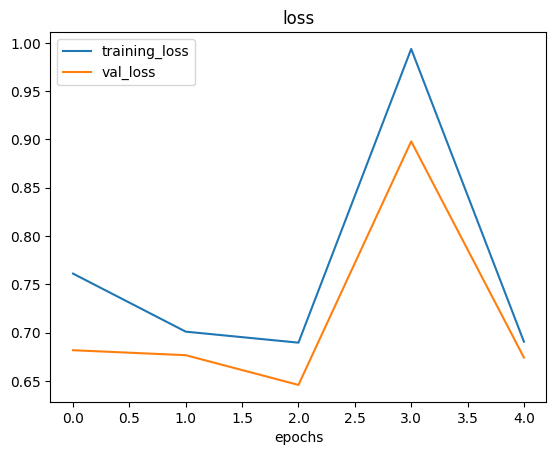

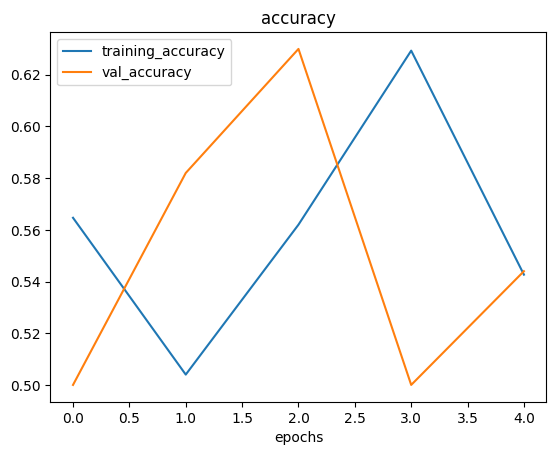

In [58]:
# Check model training curves
plot_loss_curves(history_8)

### Making a prediciton with our trained model on our own custom data

In [59]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


--2024-05-20 15:31:39--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.02s   

2024-05-20 15:31:39 (114 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

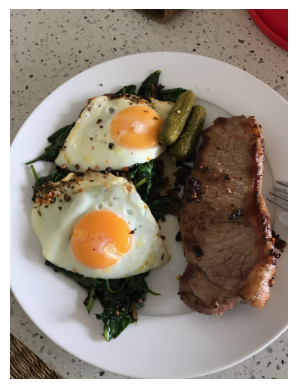

In [60]:
# View our example image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)

In [61]:
# Check the shape of out image
steak.shape

(4032, 3024, 3)

In [62]:
steak

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 111],
        [142, 121, 100],
        [101,  80,  59],
        ...,
        [164, 155, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  96],
        [138, 118,  94],
        [106,  85,  64],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 126, 102],
        [148, 128, 103],
        [114,  93,  72],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [143, 132, 126]]

**Note::** When you train a neural networl and you want to make a prediction with it on your own custom data, it's important that your custom data (or new data) is preprocessed into the same format as the data your model was trained on.

In [63]:
exapnded_steak = tf.expand_dims(steak, axis=0)

In [64]:
# Create a function to import an image and resize it to be able to be used with our model.
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and rehapes it to (img_shape, img_shape, colour_channels)
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image and get all values between 0 and 1
  img = img/255.
  return img

In [65]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [66]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))
pred

1/1 [==============================] - 0s 238ms/step


array([[0.9355479]], dtype=float32)

Looks like our custom image is being put through our model, however, it currently outputs a prediction probabbility. Wouldn't it be nice if we could visualize the image as well as the model's prediction?

In [67]:
# Remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [68]:
# We can index the prediction class by rounding the probablity and indexing it on the class names.
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [69]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a rediction with model and plots
  the image with the predicted class as its title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and prediction class
  plt.imshow(img)
  plt.title(f"Predictions: {pred_class}")
  plt.axis(False);

In [88]:
# Test our model on a custom image
# pred_and_plot(model_7, "")

--2024-05-20 15:36:25--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.01s   

2024-05-20 15:36:25 (269 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 [==============================] - 0s 18ms/step


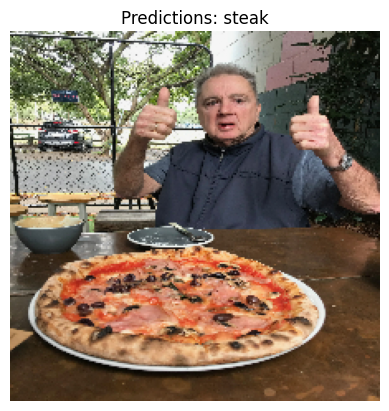

In [71]:
# Download another test custom image and make prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

pred_and_plot(model_7, "03-pizza-dad.jpeg")

Model still has issues detecting the image. However, the helper function is a great way to instantiate a prediction pipeline in a local notebook.

## Multi-class Image Classification

We've just been through a bunch of the following steps with a binary classification problem (pizza vs. steak), now we're going to step things up a notch with 10 classes of food (multiclass classification).

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat baseline/reduce overfitting)
7. Repeat until satisfied

### 1. Import and become one with the data

In [76]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2024-05-20 15:51:37--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.118.207, 74.125.200.207, 74.125.130.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.118.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  23.3MB/s    in 23s     

2024-05-20 15:52:01 (21.5 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [79]:
import os

# Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 

In [80]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [82]:
# Let's get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['2455944.jpg']
Image shape (512, 512, 3)


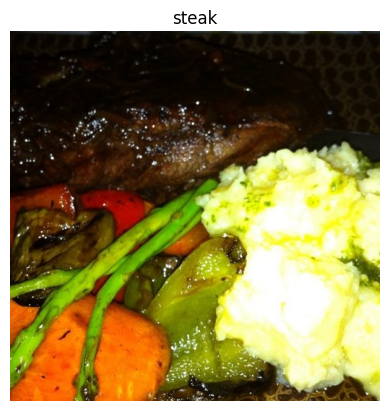

In [95]:
# Visualize, vizualize, vizualize
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

### 2. Preprocess the data (prepare it for a model)

In [108]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # target directory
                                               target_size=(224, 224), # target size of the images (height, width)
                                               class_mode='categorical', # type of data you're working with
                                               batch_size=32) # size of minibatches to load data into

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='categorical',
                                             batch_size=32)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [109]:
# Get a sample of a training data batch
images, labels = train_data.next() # get the "next" batch of images/lables in train_data
len(images), len(labels)

(32, 32)

In [110]:
# How many batches are there?
len(train_data)

235

In [111]:
# Get the first two images
# images[:2]
images[0].shape

(224, 224, 3)

In [112]:
# Veiw the first batch of labels
labels

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 

### 3. Create a model (start with a baseline)

We've been talking a lot about the CNN explainer website... how about we just take their model (also on 10 classes) and use it for our problem.

In [113]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [118]:
# Create the model (similar to prev. models, found on CNN explainer website)
model_8 = Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3)),
    Activation(activation="relu"),
    Conv2D(10, 3),
    Activation(activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3),
    Activation(activation="relu"),
    Conv2D(10, 3),
    Activation(activation="relu"),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(10, activation="softmax") # output layer (1 neron per class, softmax for categorical classification)
])

# Compile the model
model_8.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=["accuracy"])

### 4. Fit the model

In [119]:
# Fit the model
history_8 = model_8.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 36s 145ms/step - loss: 2.1647 - accuracy: 0.2048 - val_loss: 2.0260 - val_accuracy: 0.2756
Epoch 2/5
235/235 [==============================] - 33s 139ms/step - loss: 1.9530 - accuracy: 0.3188 - val_loss: 1.9678 - val_accuracy: 0.3064
Epoch 3/5
235/235 [==============================] - 34s 145ms/step - loss: 1.6997 - accuracy: 0.4219 - val_loss: 1.9849 - val_accuracy: 0.3064
Epoch 4/5
235/235 [==============================] - 36s 153ms/step - loss: 1.1078 - accuracy: 0.6349 - val_loss: 2.4458 - val_accuracy: 0.2772
Epoch 5/5
235/235 [==============================] - 36s 151ms/step - loss: 0.4253 - accuracy: 0.8680 - val_loss: 3.9006 - val_accuracy: 0.2620


### 5. Evaluate the model

In [122]:
model_8.evaluate(test_data)

79/79 [==============================] - 9s 118ms/step - loss: 3.9006 - accuracy: 0.2620


[3.9005918502807617, 0.2619999945163727]

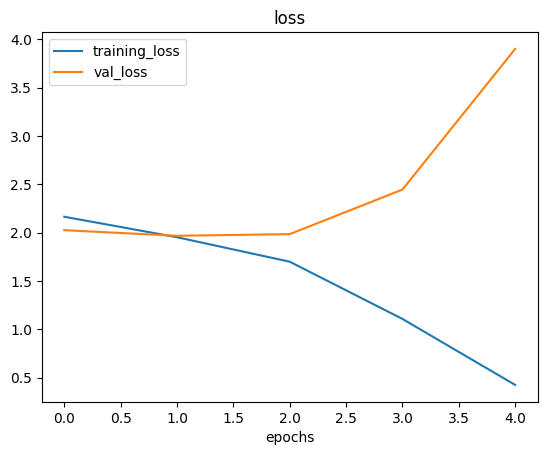

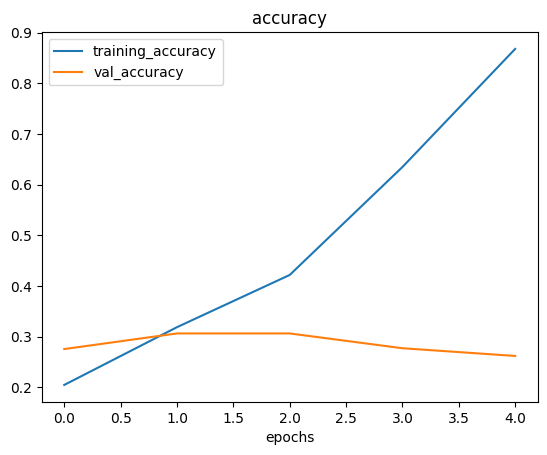

In [126]:
# Check out the loss and accuracy of model_8
plot_loss_curves(history_8)

What do these loss curves tell us?

It seems the model is overfitting the training set quite baddly... in other words, it's getting greate results on the training data but fails to generalize well to unseen data and performs poorly on the test dataset.

### 6. Adjust the model hyperparameters to beat the baseline/reduce overfitting

Due to it's performance on the training data, it's clear our model is learning something...

However, it's not generalizing well to unseen data (overfitting).

So let's try and fix overfitting by...

* **Get more data** - having more data gives a model more oppotunity to learn diverse patterns...
* **Simplify the model** - if our current model is overfitting the data, it may be too complicated of a model, one way to simplify a model is to: reduce # of layers or reduce # of hidden units in layers
* **Use data augmentation** - data augmentation manipulates the training data in such a way to add more diversity to it (without altering the original data)
* **Use transfer learning** - transfer learning leverages the patterns another model has learned on similar data to your own and allows you to use those patterns on your own dataset

In [123]:
model_8.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation_4 (Activation)   (None, 222, 222, 10)      0         
                                                                 
 conv2d_31 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 activation_5 (Activation)   (None, 220, 220, 10)      0         
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 110, 110, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_32 (Conv2D)          (None, 108, 108, 10)      910       
                                                     

In [127]:
# Create a simpler model (remove 2 conv layers)
model_9 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax") # output layer (1 neron per class, softmax for categorical classification)
])

# Compile the model
model_9.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=["accuracy"])

In [128]:
model_9.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 111, 111, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_39 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_27 (MaxPooli  (None, 54, 54, 10)        0         
 ng2D)                                                           
                                                                 
 flatten_14 (Flatten)        (None, 29160)             0         
                                                                 
 dense_19 (Dense)            (None, 10)              

In [129]:
# Fit the model with 2 conv layers removed
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=train_data,
                        validation_steps=len(train_data))

Epoch 1/5
235/235 [==============================] - 53s 220ms/step - loss: 2.2163 - accuracy: 0.2077 - val_loss: 1.9388 - val_accuracy: 0.3276
Epoch 2/5
235/235 [==============================] - 57s 244ms/step - loss: 1.9149 - accuracy: 0.3269 - val_loss: 1.6720 - val_accuracy: 0.4541
Epoch 3/5
235/235 [==============================] - 44s 189ms/step - loss: 1.6802 - accuracy: 0.4301 - val_loss: 1.3168 - val_accuracy: 0.6093
Epoch 4/5
235/235 [==============================] - 55s 232ms/step - loss: 1.3098 - accuracy: 0.5703 - val_loss: 0.9112 - val_accuracy: 0.7565
Epoch 5/5
235/235 [==============================] - 46s 194ms/step - loss: 0.8533 - accuracy: 0.7365 - val_loss: 0.5024 - val_accuracy: 0.8740


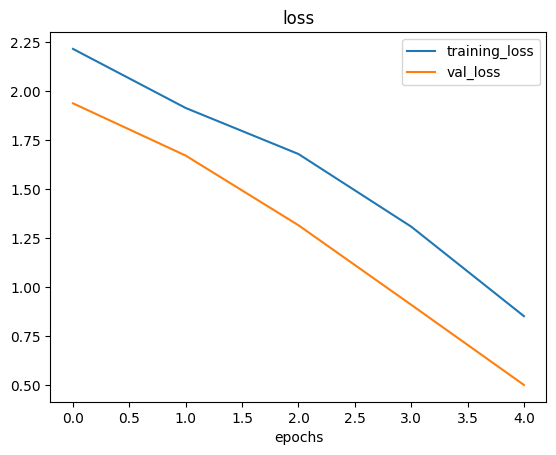

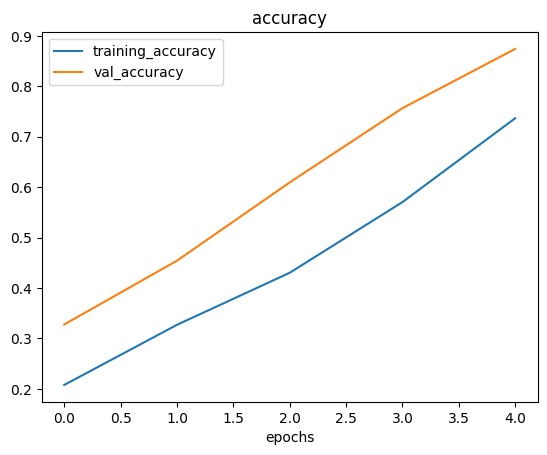

In [130]:
# Check out the loss curves of model 9
plot_loss_curves(history_9)

Look's like our "simplifying the model" experiement didn't work... the accuracy went down and overfitting continued...

How about we try data augmentation??

### Trying to reduce overfitting with data augmentation

Let's try and improve our model's results by using augmented training data...

Ideally, we want to:
* Reduce overfitting (get the trainin and validation loss curves closer)
* Improve validation accuracy

In [134]:
# Create an augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [136]:
# Let's create another model but this time we'll fit it on the augmented trainng data
model_10 = tf.keras.models.clone_model(model_8)

# Compile the cloned model (usifng the same setup as the previous models)
model_10.compile(loss="categorical_crossentropy",
                 optimizer=Adam(),
                 metrics=["accuracy"])

In [137]:
model_8.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation_4 (Activation)   (None, 222, 222, 10)      0         
                                                                 
 conv2d_31 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 activation_5 (Activation)   (None, 220, 220, 10)      0         
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 110, 110, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_32 (Conv2D)          (None, 108, 108, 10)      910       
                                                     

In [138]:
model_10.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation_4 (Activation)   (None, 222, 222, 10)      0         
                                                                 
 conv2d_31 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 activation_5 (Activation)   (None, 220, 220, 10)      0         
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 110, 110, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_32 (Conv2D)          (None, 108, 108, 10)      910       
                                                     

In [139]:
# Fit the model
history_10 = model_10.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 131s 535ms/step - loss: 2.2024 - accuracy: 0.1792 - val_loss: 2.0447 - val_accuracy: 0.2872
Epoch 2/5
235/235 [==============================] - 112s 475ms/step - loss: 2.0661 - accuracy: 0.2600 - val_loss: 1.8866 - val_accuracy: 0.3300
Epoch 3/5
235/235 [==============================] - 115s 486ms/step - loss: 2.0128 - accuracy: 0.2863 - val_loss: 1.8471 - val_accuracy: 0.3576
Epoch 4/5
235/235 [==============================] - 114s 487ms/step - loss: 1.9726 - accuracy: 0.3024 - val_loss: 1.7933 - val_accuracy: 0.3724
Epoch 5/5
235/235 [==============================] - 115s 491ms/step - loss: 1.9534 - accuracy: 0.3207 - val_loss: 1.8273 - val_accuracy: 0.3704


In [141]:
model_10.evaluate(test_data)

79/79 [==============================] - 11s 139ms/step - loss: 1.8273 - accuracy: 0.3704


[1.8273109197616577, 0.37040001153945923]

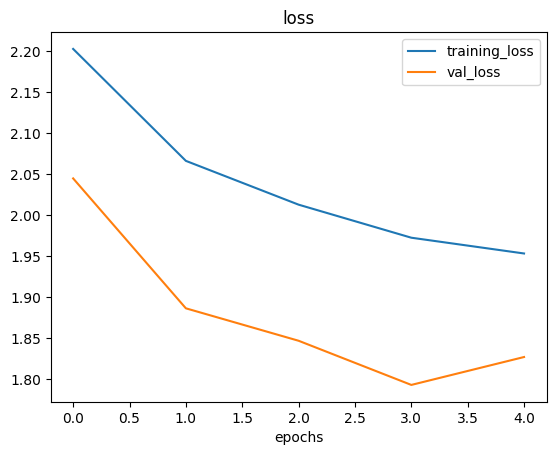

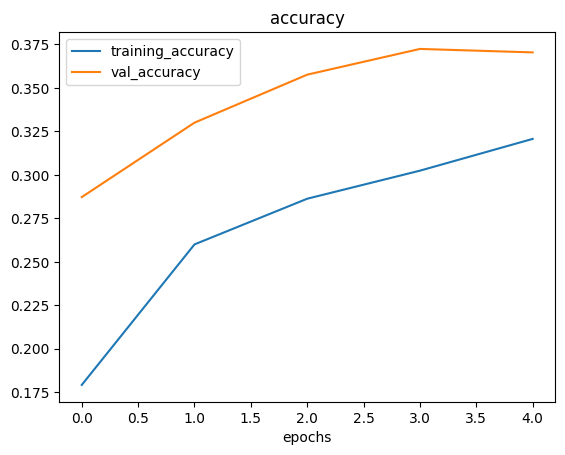

In [140]:
# Check out the loss curves of model 10
plot_loss_curves(history_10)

That looks much better, the loss curves are much closer to each other than the baseline model and they look like they're heading in the right direction. So if we were to train for longer, we might see further improvements.

### 7. Repeat until satisfied

We could keep going here... continualy trying to bring our loss curves together and trying to improve the validation/test accuracy.

How?

By running lots of expirements, namely:
* restructuring our model's architecture (increasing layers/hidden units)
* adjust the learning rate
* try different methods of data augmentation (adjust the hyperparameters in our ImageDataGenerator instance)
* training for longer (e.g. 10 epochs instead of 5 epochs)
* try **transfer Learning**

### Making a prediction with our trained model

Let's use our trained model to make some predictions on our own custom images!

In [144]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [145]:
# Download some custom images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

--2024-05-20 18:35:09--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.1’

03-steak.jpeg.1     100%[===================>]   1.89M  --.-KB/s    in 0.01s   

2024-05-20 18:35:09 (140 MB/s) - ‘03-steak.jpeg.1’ saved [1978213/1978213]

--2024-05-20 18:35:09--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 

In [156]:
# Reconfig pred_and_plot function to work with multi-class images
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a rediction with model and plots
  the image with the predicted class as its title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Add in logic for multi-class and get pred class name
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  # Plot the image and prediction class
  plt.imshow(img)
  plt.title(f"Predictions: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 18ms/step


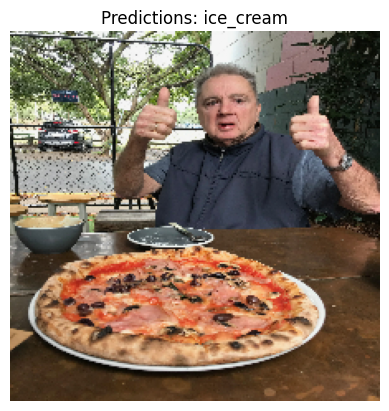

In [157]:
# Make a prediction using model 10
pred_and_plot(model=model_10,
              filename="03-pizza-dad.jpeg",
              class_names=class_names)

1/1 [==============================] - 0s 19ms/step


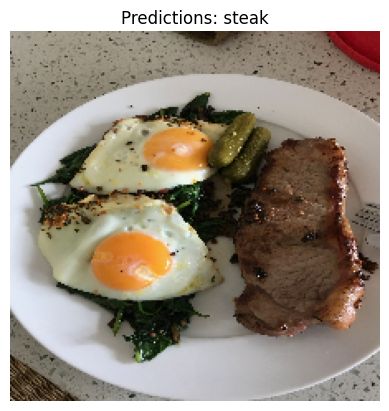

In [158]:
pred_and_plot(model=model_10,
              filename="03-steak.jpeg",
              class_names=class_names)

1/1 [==============================] - 0s 18ms/step


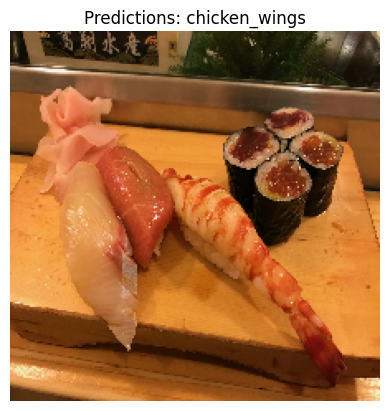

In [159]:
pred_and_plot(model=model_10,
              filename="03-sushi.jpeg",
              class_names=class_names)

1/1 [==============================] - 0s 31ms/step


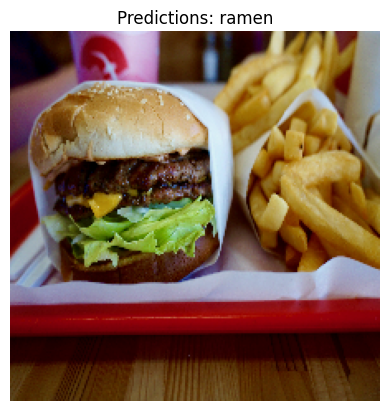

In [160]:
pred_and_plot(model=model_10,
              filename="03-hamburger.jpeg",
              class_names=class_names)

## Saving and loading our model

In [163]:
# Save a model
model_10.save("saved_trained_model_10")

In [165]:
# Load in a trained model and evaluate it
loaded_model_10 = tf.keras.models.load_model("saved_trained_model_10")
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 15s 184ms/step - loss: 1.8273 - accuracy: 0.3704


[1.8273109197616577, 0.37040001153945923]

In [166]:
model_10.evaluate(test_data)

79/79 [==============================] - 8s 107ms/step - loss: 1.8273 - accuracy: 0.3704


[1.8273111581802368, 0.37040001153945923]